<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AALU_Coding/blob/main/K_Means_basic_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Clustering**: Expectation–Maximisation



Expectation–maximisation (E–M) is a powerful algorithm that comes up in a variety of contexts within data science. k-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here. In short, the expectation–maximisation approach here consists of the following procedure:

Guess some cluster centers
Repeat until converged
E-Step: assign points to the nearest cluster center
M-Step: set the cluster centers to the mean
Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to. The "M-step" or "Maximisation step" is so-named because it involves maximising some fitness function that defines the location of the cluster centers—in this case, that maximisation is accomplished by taking a simple mean of the data in each cluster.

The literature about this algorithm is vast, but can be summarised as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

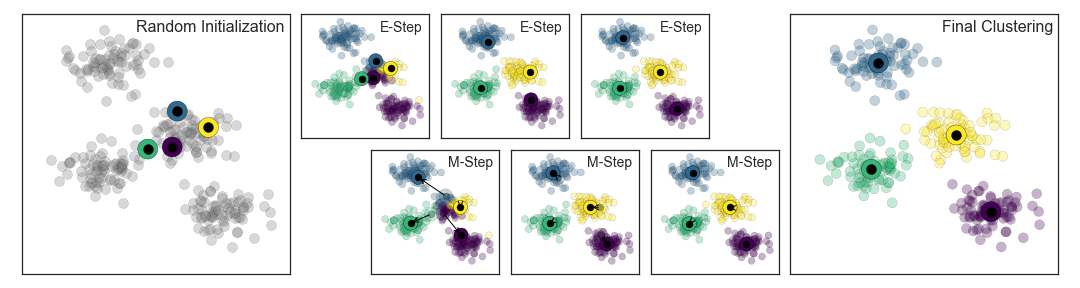

Reference: VanderPlas, J., 2016. *Python data science handbook: Essential tools for working with data*. O'Reilly Media, Inc.

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Load and Read Data

### *Case 1: Bus Dataset* 

Option 1:

In [13]:
from google.colab import drive
import os

# Place the dataset in your Google Drive 
drive.mount("/content/drive")

# Set csv file path
PATH = "/content/drive/My Drive/abalone_train.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# Read csv from Drive
df = pd.read_csv(PATH)
df

,c1,c2,c3,c4,c5,c6,c7,c8
0,0.435,0.335,0.110,0.3340,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.8740,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.0920,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.8790,0.3740,0.1695,0.2300,13
...,...,...,...,...,...,...,...,...
3315,0.605,0.475,0.180,0.9365,0.3940,0.2190,0.2950,15
3316,0.700,0.525,0.190,1.6015,0.7070,0.3650,0.4300,10
3317,0.530,0.420,0.130,0.8365,0.3745,0.1670,0.2490,11
3318,0.395,0.315,0.105,0.3515,0.1185,0.0910,0.1195,16


In [ ]:
df.describe()

Option 2:

In [ ]:
# Read csv from a local file path
from google.colab import files
uploaded = files.upload()

# Read data
df2 = pd.read_csv('abalone_train.csv')
df2
# df2.describe()

In [ ]:
df2['c5'] # Access one specific column

## K-Means Clustering

In [16]:
N = 4 #@param{type:'slider', min:2, max:8, step:1}

In [17]:
kmeans = KMeans(n_clusters=N)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

In [ ]:
X = df['c1'].tolist()
Y = df['c2'].tolist()
print(X)

## Plotting Clustering Results

In [ ]:
plt.scatter(X, Y, c=y_kmeans, s=10, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=1); # Plot centre points

### *Case 2: California Housing Dataset* 

In [21]:
PATH_2 = "/content/drive/My Drive/california_housing_train.csv"
df = pd.read_csv(PATH_2)

In [ ]:
df.describe()

In [23]:
N2 = 4 #@param{type:'slider', min:2, max:8, step:1}

In [24]:
kmeans_cal = KMeans(n_clusters=N2)
kmeans_cal.fit(df)
y_kmeans_cal = kmeans_cal.predict(df)

In [ ]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
kmeans_cal.labels_ # type: np.ndarray

In [26]:
X = df['longitude'].tolist()
Y = df['latitude'].tolist()
print(X)
print(Y)

[-114.31, -114.47, -114.56, -114.57, -114.57, -114.58, -114.58, -114.59, -114.59, -114.6, -114.6, -114.6, -114.61, -114.61, -114.63, -114.65, -114.65, -114.65, -114.66, -114.67, -114.68, -114.73, -114.94, -114.98, -115.22, -115.32, -115.37, -115.37, -115.37, -115.37, -115.38, -115.38, -115.39, -115.4, -115.4, -115.41, -115.46, -115.48, -115.48, -115.49, -115.49, -115.49, -115.49, -115.5, -115.5, -115.5, -115.51, -115.51, -115.51, -115.51, -115.52, -115.52, -115.52, -115.52, -115.52, -115.52, -115.52, -115.52, -115.52, -115.53, -115.53, -115.53, -115.53, -115.53, -115.54, -115.54, -115.54, -115.54, -115.54, -115.55, -115.55, -115.55, -115.55, -115.55, -115.55, -115.55, -115.56, -115.56, -115.56, -115.56, -115.56, -115.56, -115.56, -115.56, -115.56, -115.56, -115.57, -115.57, -115.57, -115.57, -115.57, -115.57, -115.57, -115.57, -115.58, -115.58, -115.58, -115.58, -115.58, -115.59, -115.59, -115.59, -115.6, -115.6, -115.62, -115.62, -115.64, -115.69, -115.72, -115.73, -115.73, -115.73, -

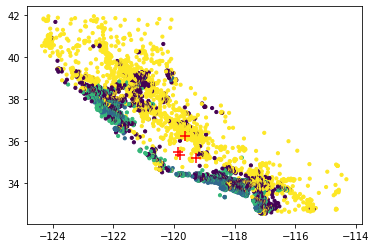

In [27]:
plt.scatter(X, Y, c=y_kmeans_cal, s=10, cmap='viridis')

centers = kmeans_cal.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='+', c='red', s=100, alpha=1); # Plot centre points

### *Case 2-1: 3D K-Means on California Housing Dataset* 

In [28]:
Z = df['housing_median_age'].tolist()
print(Z)

[15, 19, 17, 14, 20, 29, 25, 41, 34, 46, 16, 21, 48, 31, 15, 17, 28, 21, 17, 17, 20, 24, 20, 15, 18, 34, 30, 14, 32, 23, 38, 35, 16, 19, 19, 29, 33, 21, 15, 19, 17, 29, 25, 13, 18, 35, 32, 21, 20, 11, 30, 18, 38, 32, 24, 10, 18, 17, 6, 12, 25, 35, 34, 14, 23, 17, 27, 41, 23, 33, 24, 34, 23, 23, 22, 5, 21, 28, 25, 15, 20, 18, 46, 35, 29, 15, 33, 17, 29, 31, 16, 34, 20, 15, 21, 5, 10, 14, 5, 20, 8, 30, 37, 3, 20, 17, 23, 18, 16, 19, 23, 27, 44, 2, 20, 34, 15, 19, 15, 18, 5, 12, 27, 8, 15, 16, 26, 24, 20, 8, 19, 17, 29, 15, 16, 13, 20, 17, 32, 18, 22, 10, 12, 18, 22, 13, 17, 25, 16, 26, 23, 28, 22, 28, 19, 34, 19, 14, 23, 26, 38, 28, 9, 29, 32, 17, 14, 25, 10, 24, 33, 5, 3, 17, 37, 6, 5, 10, 20, 15, 11, 7, 18, 10, 19, 13, 5, 11, 24, 9, 16, 11, 17, 7, 12, 14, 6, 7, 10, 17, 15, 15, 19, 10, 16, 9, 8, 25, 17, 12, 14, 15, 26, 17, 8, 24, 19, 18, 17, 18, 5, 9, 16, 22, 6, 33, 22, 18, 3, 7, 27, 10, 14, 8, 27, 13, 5, 10, 16, 26, 20, 15, 21, 16, 12, 21, 13, 13, 17, 21, 18, 18, 5, 16, 28, 18, 31, 24,

Text(0.5, 0, 'Housing midian age')

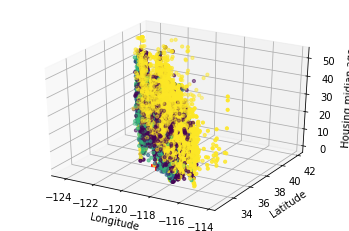

In [29]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, c=y_kmeans_cal, s=10, cmap='viridis')

centers = kmeans_cal.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], marker='+', c='red', s=100, alpha=1); # Plot centre points

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Housing midian age')